# Różniczkowanie numeryczne - podstawy

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
#formula 1
def derivative1(fun, j, h):
    return np.float32((fun(j+h) - fun(j)) / h)

#formula 3
def derivative3(fun, j, h):
    return np.float32((fun(j+1*h) - fun(j-1*h)) / (2 * h))

#formula 4
def derivative4(fun, j, h):
    return np.float32((fun(j - 2*h) - 8*fun(j-h) + 8*fun(j+h) - fun(j + 2*h)) / (12 * h))

In [3]:
x = 1
h = 0.01

In [4]:
#value analytically
fun1_true_derivative = -np.sin(x, dtype='float32')
fun2_true_derivative = 2 * np.cos(2 * x, dtype='float32')
fun3_true_derivative = np.float32(4 * x - 3)

In [5]:
fun1 = lambda x: np.cos(x, dtype='float32')
fun2 = lambda x: np.sin(2*x, dtype='float32')
fun3 = lambda x: np.float32(2 * (x ** 2) - 3 * x + 6)

In [6]:
fun1_derivative1 = derivative1(fun1, x, h)
fun1_derivative3 = derivative3(fun1, x, h)
fun1_derivative4 = derivative4(fun1, x, h)

fun2_derivative1 = derivative1(fun2, x, h)
fun2_derivative3 = derivative3(fun2, x, h)
fun2_derivative4 = derivative4(fun2, x, h)

fun3_derivative1 = derivative1(fun3, x, h)
fun3_derivative3 = derivative3(fun3, x, h)
fun3_derivative4 = derivative4(fun3, x, h)

In [7]:
print('\t cos(x)\n= = = = = = = = = = = = = = \n')

print('true value:', fun1_true_derivative)

print('\n\tvalues:')
print('formula1: ', fun1_derivative1)
print('formula3: ', fun1_derivative3)
print('formula4: ', fun1_derivative4)

print('\n\tdifference (%):')
print('formula1: ', (fun1_true_derivative - fun1_derivative1) / fun1_true_derivative * 100)
print('formula3: ', (fun1_true_derivative - fun1_derivative3) / fun1_true_derivative * 100)
print('formula4: ', (fun1_true_derivative - fun1_derivative4) / fun1_true_derivative * 100)

	 cos(x)
= = = = = = = = = = = = = = 

true value: -0.84147096

	values:
formula1:  -0.84415674
formula3:  -0.84145665
formula4:  -0.8414711

	difference (%):
formula1:  -0.3191774245351553
formula3:  0.001700012944638729
formula4:  -1.4166774064960919e-05


In [8]:
print('\t sin(2x)\n= = = = = = = = = = = = = = \n')

print('true value:', fun2_true_derivative)

print('\n\tvalues:')
print('formula1: ', fun2_derivative1)
print('formula3: ', fun2_derivative3)
print('formula4: ', fun2_derivative4)

print('\n\tdifference (%):')
print('formula1: ', (fun2_true_derivative - fun2_derivative1) / fun2_true_derivative * 100)
print('formula3: ', (fun2_true_derivative - fun2_derivative3) / fun2_true_derivative * 100)
print('formula4: ', (fun2_true_derivative - fun2_derivative4) / fun2_true_derivative * 100)

	 sin(2x)
= = = = = = = = = = = = = = 

true value: -0.832293689250946

	values:
formula1:  -0.8504212
formula3:  -0.8322388
formula4:  -0.83229494

	difference (%):
formula1:  -2.1780173567348924
formula3:  0.006595733999562147
formula4:  -0.00015039132898024438


In [9]:
print('\t 2x^2 - 3x + 6\n= = = = = = = = = = = = = = \n')

print('true value:', fun3_true_derivative)

print('\n\tvalues:')
print('formula1: ', fun3_derivative1)
print('formula3: ', fun3_derivative3)
print('formula4: ', fun3_derivative4)

print('\n\tdifference (%):')
print('formula1: ', (fun3_true_derivative - fun3_derivative1) / fun3_true_derivative * 100)
print('formula3: ', (fun3_true_derivative - fun3_derivative3) / fun3_true_derivative * 100)
print('formula4: ', (fun3_true_derivative - fun3_derivative4) / fun3_true_derivative * 100)

	 2x^2 - 3x + 6
= = = = = = = = = = = = = = 

true value: 1.0

	values:
formula1:  1.0200024
formula3:  0.99999905
formula4:  0.99999905

	difference (%):
formula1:  -2.0002365112304688
formula3:  9.5367431640625e-05
formula4:  9.5367431640625e-05


In [10]:
def drawChart(points, fun1, fun2, fun3, h, scale = 'linear'):
    df = pd.DataFrame({
        'x_values': points,
        'y1_values': fun1, 
        'y2_values': fun2, 
        'y3_values': fun3
    })

    plt.plot('x_values', 'y1_values', marker='o', data = df, color = 'green', linewidth = 1, linestyle = 'dashdot', label = "function 1")
    plt.plot('x_values', 'y2_values', marker='o', data = df, color = 'blue', linewidth = 1, linestyle = 'dashed', label = "function 3")
    plt.plot('x_values', 'y3_values', marker='o', data = df, color = 'purple', linewidth = 1, linestyle = 'dotted', label = "function 4")

    plt.xlabel("X points", fontsize = 12)
    plt.ylabel("Error value", fontsize = 12)
    plt.title(f'Error value of functions, h = {h}')
    plt.grid(True, axis = 'y')
    
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')

    plt.legend()

    plt.show()

In [11]:
def error_analysis(formula_no = '1', points = [1, 3, 5, 20, 500, 1000], hmin = 2, hmax = 7, scale = 'linear'):
    if formula_no == '1':
        formula = derivative1
    elif formula_no == '3':
        formula = derivative3
    elif formula_no == '4':
        formula = derivative4
    else:
        raise ValueError('Wrong formula number.')
        
    for i in range (hmin, hmax + 1):
        h = 10 ** -i
        
        fun1_errors = []
        fun2_errors = []
        fun3_errors = []
        
        for point in points:
            fun1_true_derivative = -np.sin(point, dtype='float32')
            fun2_true_derivative = 2 * np.cos(2 * point, dtype='float32')
            fun3_true_derivative = np.float32(4 * point - 3)
            
            error1 = abs(fun1_true_derivative - formula(fun1, point, h))
            error2 = abs(fun2_true_derivative - formula(fun2, point, h))
            error3 = abs(fun3_true_derivative - formula(fun3, point, h))
            
            fun1_errors.append(error1)
            fun2_errors.append(error2)
            fun3_errors.append(error3)
        
        drawChart(points, fun1_errors, fun2_errors, fun3_errors, h, scale)

In [ ]:
print('\t\t Error of function (1), linear scale')
print('\t===================================================')
error_analysis(1)
print('\t\t Error of function (1), log scale')
print('\t===================================================')
error_analysis(1, scale = 'log')

In [ ]:
print('\t\t Error of function (3), linear scale')
print('\t===================================================')
error_analysis(3)
print('\t\t Error of function (3), log scale')
print('\t===================================================')
error_analysis(3, scale = 'log')

In [ ]:
print('\t\t Error of function (4), linear scale')
print('\t===================================================')
error_analysis(4)
print('\t\t Error of function (4), log scale')
print('\t===================================================')
error_analysis(4, scale = 'log')

In [14]:
fun = lambda x: 2 * np.cos(2 * x, dtype='float32')
derivative_an = lambda x: -4 * np.sin(2 * x, dtype='float32')

x = np.linspace(0, 2 * np.pi, 100)
y_an = derivative_an(x)

h = 0.5
y1 = [derivative1(fun, point, h) for point in x]
y2 = [derivative3(fun, point, h) for point in x]
y3 = [derivative4(fun, point, h) for point in x]

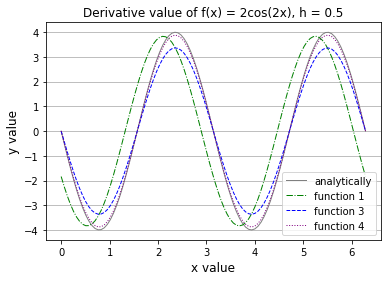

In [15]:
#set data
df = pd.DataFrame({
    'x_values': x,
    'y_an_values': y_an,
    'y1_values': y1, 
    'y2_values': y2, 
    'y3_values': y3
})

plt.plot('x_values', 'y_an_values', data = df, color = 'gray', linewidth = 1, linestyle = 'solid', label = "analytically")
plt.plot('x_values', 'y1_values', data = df, color = 'green', linewidth = 1, linestyle = 'dashdot', label = "function 1")
plt.plot('x_values', 'y2_values', data = df, color = 'blue', linewidth = 1, linestyle = 'dashed', label = "function 3")
plt.plot('x_values', 'y3_values', data = df, color = 'purple', linewidth = 1, linestyle = 'dotted', label = "function 4")

plt.xlabel("x value", fontsize = 12)
plt.ylabel("y value", fontsize = 12)
plt.title(f'Derivative value of f(x) = 2cos(2x), h = {h}')
plt.grid(True, axis = 'y')

plt.legend()

#uncomment to save chart image
#plt.savefig('derivative_chart.jpeg', dpi = 500, transparent = True)

plt.show()

In [16]:
def derivative_2deg(fun, j, h):
    return np.float32((fun(j-h) - (2*fun(j)) + fun(j+h)) / (h**2))

In [17]:
fun = lambda x: np.cos(x)
x = 0

derivative_2deg(fun, x, 0.001)

-0.99999994

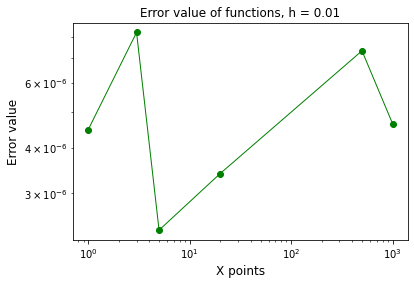

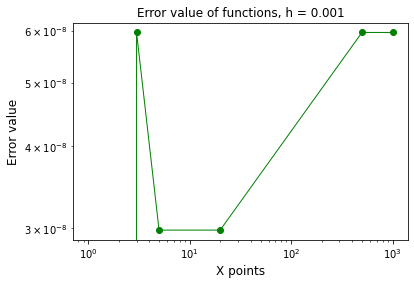

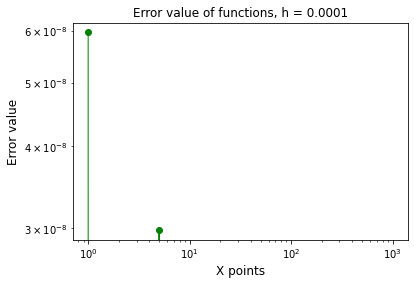

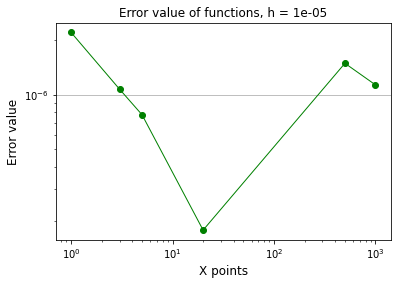

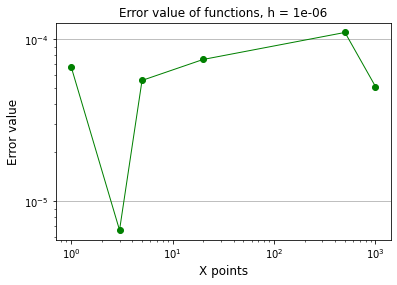

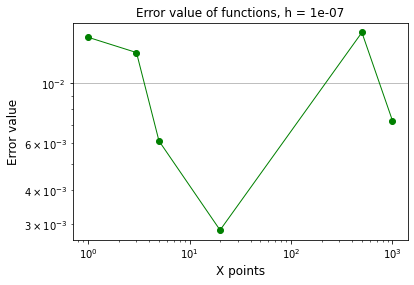

In [18]:
points = [1, 3, 5, 20, 500, 1000]
hmin = 2
hmax = 7

for i in range (hmin, hmax + 1):
        h = 10 ** -i
        fun_errors = []
        
        for point in points:
            fun_true_derivative = -np.cos(point, dtype='float32')
            
            error = abs(fun_true_derivative - derivative_2deg(fun, point, h))
            fun_errors.append(error)
            
        df = pd.DataFrame({
        'x_values': points,
        'y_values': fun_errors
        })

        plt.plot('x_values', 'y_values', data = df, marker = 'o', color = 'green', linewidth = 1, label = "function 1")
        plt.xlabel("X points", fontsize = 12)
        plt.ylabel("Error value", fontsize = 12)
        plt.title(f'Error value of functions, h = {h}')
        plt.grid(True, axis = 'y')
    
        plt.xscale('log')
        plt.yscale('log')

        plt.show()